------

# Data Analysis and Knowledge Discovery: Exercise 2, Supervised learning

The previous exercise was about <i>data understanding</i> and <i>data preparation</i>, which formed the basis for the modeling phase of the data mining process. Many modeling techniques make assumptions about data so the exploration and preparation phases can't be ignored. Now, as we have checked the validity of data and familiarized ourselves with it, we can move on to the next stage of the Cross-Industry Standard Process for Data Mining (CRISP-DM) which is <font color = darkorchid><i>modeling</i></font>.

The questions to be answered at this stage could be for example:

- What kind of model architecture best fits our data?
- How well does the model perform technically?
- Could we improve that performance?
- How the performance of the model is evaluated?

<i>Machine learning</i> is a subfield of artificial intelligence which provides automatic, objective and data-driven techniques for modeling the data. The machine learning algorithms aim to learn from data to make predictions. The two main branches of it are <i>supervised learning</i> and <i>unsupervised learning</i>.  In this exercise, we are going to use the former -- <font color = darkorchid><i>supervised learning</i></font> -- for classification and regression tasks.

For classification, data remains the same as in the previous exercise, but I've already cleaned it up for you. Some data pre-processing steps are still required to ensure that it's in an appropriate format, so that models can learn something from it. Even though we are not doing any major data exploration nor data preparation here this time, <i>you should <b>never</b> forget it in your future data analyses</i>.

-----

<b>General guidance for exercises</b>

- Answer <b>all</b> questions below, even if you can't get your script to fully work.
- Write clear and easily readable code, and include explanations what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots.
- You can add more code and markup cells, as long as the flow of the notebook stays readable and logical.
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- +1 bonus point (grading *Pass with honors*) requires a <b>completely</b> correct solution and also thorough analysis.
- If you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via moodle chat or email from the course assistants.
- Note! Don't leave it to the last moment! No feedback service during weekends.

<font color = red size = 4><b>The deadline is 28 November at 18:00</b></font>. Late submissions will not be accepted unless there is a valid excuse for extending the deadline before the due date.

------

### Gather **all** packages needed for this notebook here:

You can use other packages as well, but this excercise can be completed with those below.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Ridge

# Show the plots inline in the notebook
%matplotlib inline

______________
## <font color = lightcoral>1. Classification using k-nearest neighbors </font> 

We start exploring the world of data modeling by using <font color = darkorchid><b>K-Nearest Neightbors (k-NN) algorithm</b></font>. The k-NN algorithm is one of the classic supervised machine learning algorithms. It assumes that similar points are close to each other. 

In our case, we'll use the k-NN algorithm to **predict the presence of cardiovascular disease** using all the other variables as <font color = darkorchid><b>features</b></font> in the given data set. So, the target variable is <font color = darkorchid><b>cardio</b></font>.

But first, we need data for the task. The code for loading the data into the environment is provided for you. <font color = red>The code should work, but make sure, that you have the csv file of the data in the same directory where you have this notebook file.</font> 

***Exercise 1 A)*** 

Print the first 10 rows to check that everything is ok with the created dataframe.

*note: as said, the data remains the same, but cholesterol has been one-hot-encoded for you already. There's also a new variable gluc (about glucose levels), which is one-hot-encoded for you. It has the similar values as cholesterol originally does [normal, at risk, elevated]. Also, binary variables have been changed to [0,1] values.*


In [186]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Path for the data
data_path = 'ex2_cardio_data.csv'

# Create a dataframe
cardio_data = pd.read_csv(data_path, dtype='int')

In [187]:
### Code - 10 first row
cardio_data.head(10)

,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_at_risk,cholesterol_elevated,cholesterol_normal,gluc_at_risk,gluc_elevated,gluc_normal
0,22767,0,162,75,120,80,0,0,1,0,0,0,1,0,0,1
1,19102,0,164,80,140,90,0,0,1,0,0,0,1,0,0,1
2,23251,0,155,76,130,80,0,0,1,0,0,0,1,0,1,0
3,22651,1,169,65,120,80,0,0,1,0,0,0,1,0,0,1
4,21770,1,171,67,160,100,0,0,0,1,0,0,1,0,0,1
5,14651,1,170,70,120,80,0,0,1,0,0,0,1,0,0,1
6,17391,0,152,65,110,70,0,0,1,0,0,0,1,0,0,1
7,14792,0,165,65,120,70,0,0,1,0,0,0,1,0,0,1
8,15982,1,180,81,110,70,1,0,1,0,0,0,1,0,0,1
9,19589,0,156,60,120,90,0,0,1,0,0,0,1,0,0,1


----

We have the data so let's make use of it. 

To teach the k-NN algorithm (or any kind of machine learning algorithm) to recognize patterns, we are going to need <font color = darkorchid><b>training data</b></font>. But to test how well a model possibly learned those patterns, we'll need <font color = darkorchid><b>test data</b></font> which is new and unseen for the trained model. Keep in mind that the test set is not shown for the model before we are actually done with training. 

So, to **find the estimate for the performance of a model**, we are going to use this <font color = darkorchid><b>train-test split</b></font>. "Split" because we literally split the data into two sets.

Sometimes <font color = darkorchid>stratification</font> needs to be considered. It can be used to ensure that train and test sets contain the same proportions of samples of each target class as the original data set.

***Exercise 1 B)*** 

Gather the features as an array `features`, and the target variable as an array `labels`. Produce training and test data.  Divide the data **randomly** into training (80%) and test (20%) sets.

- Would it be a good idea to use stratification? **Explain** your decision.

In [188]:
### Code - Train-test split
features = cardio_data.drop("cardio", axis=1)
labels = cardio_data['cardio']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=123 )

<font color = red> ***Yes, it would be a good idea to use stratification for a classification problem, because by ensuring that the train and test sets contain the same proportions of samples of each class as the original data, we are ensuring that both data sets will translate the same behavior or patterns shown in the original data even with technically smaller dataset, and that way the model can properly learn the hidden patterns from the data***

----------

***Exercise 1 C)*** 

Scale the numeric features. 

- Remind yourself briefly why you need this step. 
- What can you say about scaling especially from the perspective of the k-NN algorithm?

*tip: You should now have **two** variables where you have the features divided into. Don't forget to scale the test data. Some good information about preprocessing and how to use it for train and test data can be found https://scikit-learn.org/stable/modules/preprocessing.html.*

In [189]:
### Code - Standardization
scaler = StandardScaler()
num_features = ['age','height','weight','ap_hi','ap_lo']
X_train_scaled = pd.concat([pd.DataFrame(scaler.fit_transform(X_train[num_features]), columns=num_features), 
                            X_train[X_train.columns[~X_train.columns.isin(num_features)]].reset_index()], axis=1).set_index('index')
X_test_scaled = pd.concat([pd.DataFrame(scaler.fit_transform(X_test[num_features]), columns=num_features), 
                            X_test[X_test.columns[~X_test.columns.isin(num_features)]].reset_index()], axis=1).set_index('index')

<font color = red> ***Data standardization is important for efficient data analysis, it is most useful when the features have ranges with large differences or are measured in different units, standardization comes in handy to solve this issue by transforming our data to be on the same scale. For models that are based on distance computation like K-NN scaling is crucial, because for example if one feature has a broader range of values, the distances will be affected by this feature, which will bias our analysis.***

-------

It's time for us to train the model!

***Exercise 1 D)*** 

Train a k-NN model with $k=3$. Print out the confusion matrix.
- What can you say about the confusion matrix?
- How does the model perform with the different classes? Where do you think the differences come from?
- What is the total classification accuracy? How would you interpret it?
- Perform also the following:
    - Make 1000 **different** train and test set splits.
    - Run the k-NN model (with $k=3$) for each split and save its accuracy.  
    - Plot accuracies in a histogram.
    - Discuss your results


*tip: `sklearn.metrics.classification_report` is a great way to build up a text report showing the main classification metrics*

In [190]:
### Code - kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('The total model accuracy  : '+ str(knn.score(X_test_scaled, y_test)*100)+'%')

The total model accuracy  : 75.0%


C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Actual Labels')

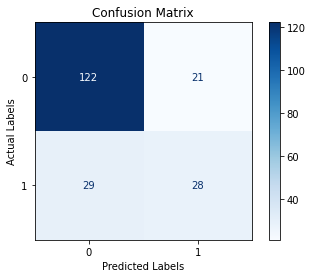

In [191]:
# confusion matrix
y_pred = knn.predict(X_test_scaled)

matrix = metrics.plot_confusion_matrix(knn, X_test_scaled, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

In [192]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       143
           1       0.57      0.49      0.53        57

    accuracy                           0.75       200
   macro avg       0.69      0.67      0.68       200
weighted avg       0.74      0.75      0.74       200



In [195]:
### Code - 1000 different train-test-splits
features_scaled = pd.concat([pd.DataFrame(scaler.fit_transform(features[num_features]), columns=num_features), 
                            features[features.columns[~features.columns.isin(num_features)]].reset_index()], axis=1).set_index('index')

accuracies = []

for i in range(1000):
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(features_scaled, labels, test_size=0.2, stratify=labels)    
    knn.fit(X_train_i, y_train_i)
    accuracies.append(knn.score(X_test_i, y_test_i))
# for the purpose of this exercice I removed the random state so that we will get a different split each iteration

Text(0.5, 0, 'accuracy')

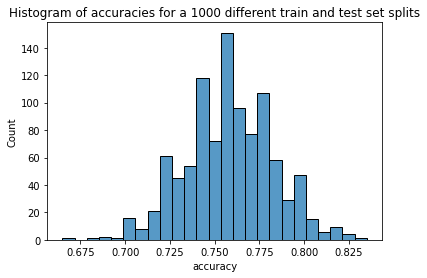

In [196]:
sns.histplot(accuracies)
plt.title('Histogram of accuracies for a 1000 different train and test set splits')
plt.xlabel('accuracy')

<font color = red> ***- Based on the results of the confusion matrix, we can notice that the vast majority of the model predictions fall under the True positives category, meaning that the model was able to correctly label a big number of individuals without the cardiovascular disease 'class 0', however, this was not the case of the 'class 1' as the number of True negatives is almost identical to False negatives, meaning that the model didn't do so well in predicting the presence of cardiovascular disease. So the model might be good in detecting the absence of the disease, and that is probably due to the fact that the target class was a bit unbalanced and the model learned the pattern for class 0 but not so much for class 1
    <br>- the total classification accuracy of our model was 75% meaning that the model was 75% accurate in predicting unseen data
    <br>- When we performed a 1000 splits we can notice that the accuracies generally fall between 65% and 83% with a similar mean to our previous model of 76%*** 

------

One really common evaluation metric is <font color = darkorchid><b>the area under the receiver operating characteristic (AUROC or AUC-ROC)</b></font>.

***Exercise 1 E)*** 

Explain what information you can learn about the one k-NN model you trained by using AUROC. Also, evaluate the performance by computing  the metric and plotting the related curve. Draw also the line for random guesses.

- How would you interpret the results?

In [200]:
predicted_proba = knn.predict_proba(X_test_scaled)[:,1]
metrics.roc_auc_score(y_test, predicted_proba)

0.8808735124524598

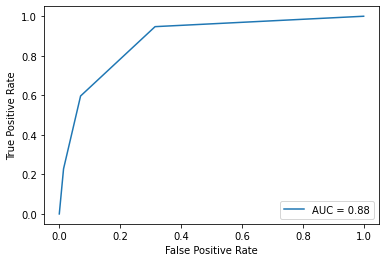

In [204]:
fpr, tpr, _ = metrics.roc_curve(y_test, predicted_proba)
rocauc = metrics.auc(fpr, tpr)
auroc_curve = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=rocauc)
auroc_curve.plot()

<font color = red> \***In general, an AUC of 0.5 suggests no discrimination between the classes, the closer the curve to the top left corner the better, our model resulted to a value of 0,88 which is considered very good***  </font>

__________
## <font color = royalblue> 2. Classification accuracy using leave-one-out cross validation

Even thought the train-test split gives us an unbiased estimate of the performance, we only evaluate the model one time. Especially with very small data sets, a test set will be very small. How can we be sure that the evaluation is accurate with this small test set and not just a good (or bad) luck? And what if we'd like to compare two models and the other seems to be better -- how can we be sure that it's not just a coincidence?

Well, there's a great help available and it's called <font color = darkorchid><b>cross-validation</b></font>. This time, we'll take a look at <font color = darkorchid><i>leave-one-out cross-validation</i></font>.

***Exercise 2 A)***

Describe *in your own words*, how leave-one-out cross validation works? How does it actually differ from the basic train-test split?

<font color = red> ***Leave-one-out cross-validation is one category of cross-validation where the number of folds k is equal to the number of observations in our data set. This means that the model will be trained once for every observation, using all the other remaining observations as a training set and using the selected observations as a one item test set. In our case this would be similar the 1000 different train-test splits***

---------------

***Exercise 2 B)***

Let's predict once again the **presence of cardiovascular disease** using all the other variables in the dataset as features. Now, use leave-one-out cross validation to estimate the model performance. Again, use a kNN classifier with $k=3$.

- What is the classification accuracy? Compare the result with the one you got in the previous task.

*tip: Sure this could be done manually, but `cross_val_score` is quite a handy function too.*

In [109]:
### Code - Leave-one-out cross validation
cv = LeaveOneOut()
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), features_scaled, labels, scoring='accuracy',
                         cv=cv, n_jobs=-1)

In [113]:
print('Accuracy for leave-one-out : ' +str(np.mean(scores)*100) + '%')

Accuracy for leave-one-out : 76.0%


<font color = red> ***The resulting accuracy for leave-one-out is quiet similar to the mean accuracy in the last task, confirming our theory that the n-time train-test splits more or less explains the approach for leave-one-out***

____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross validation

So far, we've trained one model at a time and I've given the value of k for you. Accuracy is what it is (no spoilers here), but could we still do a little better? Let's try that by <font color = darkorchid><b>hyperparameter tuning</b></font>.

This time, we're going to train multiple models, let's say 30, and choose the best K-Nearest Neighbors model among the others. Almost all models have some parameters that need to be chosen. As does the k-NN, I just happened to choose the k value of 3 for you. Note, k-NN has many other hyperparameters too, but for the sake of simplicity, this time we'll focus only on the nearest neighbors. 

Now, you're supposed to find that *optimal value* for k.

***Exercise 3***

Repeat the model performance estimation with values $k=1...30$ using again leave-one-out cross validation.

- Which value of k produces the best classification accuracy?
- If the number of k is still increased, what is the limit that the classification accuracy approaches? Why? 
- Can you say something about the performance of this selected model with new, unseen data? Explain, how you could you estimate the performance of this selected model.

*tip: `GridSearchCV` is a good class for this but will you get the other but the best k value out of it?*

In [122]:
### Code - Select best k
grid = GridSearchCV(KNeighborsClassifier(), dict(n_neighbors=list(range(1, 31))), 
                    cv=cv, scoring='accuracy', return_train_score=False, verbose=1)
  
grid.fit(X_train_scaled, y_train)
grid.best_params_

Fitting 800 folds for each of 30 candidates, totalling 24000 fits


{'n_neighbors': 25}

In [123]:
accuracy = grid.best_score_ *100
print("Accuracy for the training dataset after tuning is : {:.2f}%".format(accuracy) )

Accuracy for the training dataset after tuning is : 78.62%


In [131]:
# if we increase the number of neighbors
grid_cv = pd.DataFrame(grid.cv_results_)[['param_n_neighbors','mean_test_score']]
grid_cv

,param_n_neighbors,mean_test_score
0,1,0.72250
1,2,0.75125
2,3,0.75625
3,4,0.75625
4,5,0.77250
5,6,0.76250
6,7,0.77625
7,8,0.76750
8,9,0.77875
9,10,0.77500


In [125]:
#performance on unseen data
knn_cv = KNeighborsClassifier(n_neighbors=25)

knn_cv.fit(X_train_scaled, y_train)

test_accuracy = knn_cv.score(X_test_scaled, y_test)

print("Accuracy for the test dataset for the selected model is : {:.2f}%".format(test_accuracy) )

Accuracy for the test dataset for the selected model is : 0.76%


<font color = red> ***- It looks like the value of k=25 is the value that produces the best classification accuracy
<br>- If we increase the number of k the accuracy seems to either stay the same or increase, and that's because the model becomes too generalized and chooses only values that are closest to the data sample, and so this results in a very complex decision boundary
<br>- The performance of the model on the training data is about 78%, which is much better than all the previously trained models, however, for the unseen data the accuracy is 76% .A higher accuracy for training data is rather normal because the model has already seen the different patterns that exist in that dataset, however maybe by tuning other hyperparameters we can improve our test set accuracy***

________________
## <font color = red>  4. Testing with training data <font color = red> (this should *never* be done out of this exercise!) </font>

Oh, but what if we just used the ***whole data*** in training? Wouldn't we like to use as much data as possible to discover the underlying pattern in the data so why **not** to use the whole data?

*Never ever* do this out of this exercise. Why? Let's take a look.

***Exercise 4***

Repeat the previous task but use the whole data for training. Plot the resulting classification accuracy versus $k = 1...30$. Include the values from the previous task in the *same figure*.

- Comment your result and answer, why you should not test with training data?

In [133]:
### Code - Train with whole data
### Code - Select best k
  
grid_data_all = GridSearchCV(KNeighborsClassifier(), dict(n_neighbors=list(range(1, 31))), 
                             cv=cv, scoring='accuracy', return_train_score=False,verbose=1)
  
grid_data_all.fit(features_scaled, labels)
grid_data_all.best_params_

Fitting 1000 folds for each of 30 candidates, totalling 30000 fits


{'n_neighbors': 8}

In [134]:
accuracy_data_all = grid_data_all.best_score_ *100
print("Accuracy of the model trained on the entire dataset : {:.2f}%".format(accuracy_data_all) )

Accuracy of the model trained on the entire dataset : 78.00%


In [138]:
#testing with training data
knn_data_all = KNeighborsClassifier(n_neighbors=8)

knn_data_all.fit(features_scaled, labels)

test_accuracy = knn_data_all.score(features_scaled, labels)

print("Accuracy for testing with training data for the selected model is : {:.2f}%".format(test_accuracy) )

Accuracy for testing with training data for the selected model is : 0.81%


In [135]:
grid_cv_all = pd.DataFrame(grid_data_all.cv_results_)[['param_n_neighbors','mean_test_score']]

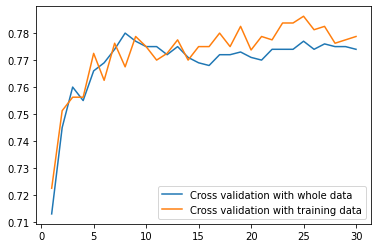

In [136]:
### Code - Plot results
plt.plot(grid_cv_all['param_n_neighbors'], grid_cv_all['mean_test_score'], label= 'Cross validation with whole data')
plt.plot(grid_cv['param_n_neighbors'], grid_cv['mean_test_score'], label= 'Cross validation with training data')
plt.legend()

 <font color = red> ***While we can notice from the plot that the fluctuations of the result do not differ that much, mainly because our data size is fairly small so comparing the performance on a 1000 observations data-set wouldn't differ much when comparing it to the performance on a 800 observations data-set. The main issue here is when we see a 81% accuracy for the test data, because the model is already familiar with the data it is overfitted to its patterns, this is why it is important to split our data and test the model on 'unseen' data***

_____________________

## <font color = darkorange> 5. Comparison of ridge regression and kNN regression </font>

The previous exercises were about classification. Now, we are ready to see another kind of supervised learning - regression. We're going to use <font color = darkorchid><b>Ridge Regression</b></font> and <font color = darkorchid><b>K-Nearest Neighbors Regression</b></font>, and compare the performances of these models.

To make this exercise more intuitively, let's change the data to another somewhat famous dataset called *The Boston Housing Dataset*. The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston, Massachusetts. Let's have a quick peek at the variables:

- **CRIM** - per capita crime rate by town
- **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS** - proportion of non-retail business acres per town.
- **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX** - nitric oxides concentration (parts per 10 million)
- **RM** - average number of rooms per dwelling
- **AGE** - proportion of owner-occupied units built prior to 1940
- **DIS** - weighted distances to five Boston employment centres
- **RAD** - index of accessibility to radial highways
- **TAX** - full-value property-tax rate per \$10,000
- **PTRATIO** - pupil-teacher ratio by town
- **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT** - % lower status of the population
- **MEDV** - Median value of owner-occupied homes in \$1000's


No worries if the variables don't make a lot of sense. However, the object is to predict **the median house value**. So the target variable is now <font color = darkorchid><b>MEDV</b></font> and all the others are <font color = darkorchid><b>features</b></font>.

There's the code chunk for loading data provided again. <font color = red>Again, the data file should be located in the same directory as this notebook file!</font>

In [139]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Data path
data_path = 'ex2_boston_housing_data.csv'

# Load the data 
boston_data = pd.read_csv(data_path, dtype='float')

-----------

With regression, we can examine **the relationship between two or more variables**. This relationship is represented by an *equation*, which itself represents how much y changes with any given change of x. So for example, we could use *age* as an independent variable to predict *height* (a dependent variable). 

We start by looking at the relationships between the variables in the given dataset.


***Exercise 5 A)***

Make scatter plots where you present each feature versus the target variable `MEDV`.

- What can you say about the relationships?

*tip: seaborn.pairplot is quite a handy function where you can set x_vars and y_vars to point out the variables you need*

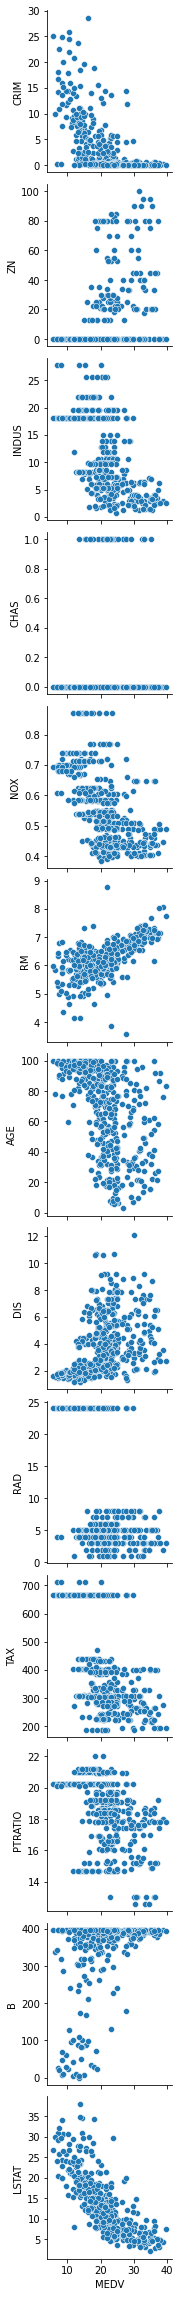

In [140]:
### Code - Scatter plots
features_boston = boston_data.drop('MEDV', axis=1)
labels_boston = boston_data['MEDV']
sns.pairplot(data=boston_data, x_vars=['MEDV'], y_vars=features_boston.columns)

<font color = red>***- Based on the pairplot above, we can notice that the columns LSTAT, RM have a strong relationship with the target variable, with RM having a positive relation and LSTAT having a negative one
    <br>- Some other variables such as CRIM, NOX, INDUS, and DIS seem to show a weaker relationship with MEDV
    <br>- While other variables like ZN, AGE, TAX, and PTRATIO don't seem to show a visual relationship*** </font> 

------

We are about to compare two different regression models. We need to be sure that both are *the best models* among the other trained models. But to make sure that these selected models really are the best ones, we're going to use a combination of cross-validation and hyperparameter tuning right away. What's the other way to ensure that the chosen hyperparameters are appropriate for the given data?

For the k-Nearest neighbors, we have previously get familiar with the optimization of the k value. Let's continue with this value to find the *optimal k* for the k-nearest neighbors regression too. With ridge regression, we have this hyperparameter called $\lambda$ (read as 'lambda'). We'll use this parameter for model selection.


To compare the models, let's use a loss function called <font color = darkorchid><b>mean absolute error (MAE)</b></font>. 



***Exercise 5 B)***

Do you need to prepare the data a little? Explain your decision.

In [57]:
### Code - Preparation
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,2.859473,10.825482,11.178758,0.059957,0.554025,6.203176,68.283084,3.861389,9.400428,407.528908,18.581799,357.492741,13.047259,21.113490
std,5.204950,22.435436,6.810618,0.237662,0.117089,0.591121,28.062858,2.113944,8.657791,167.120323,2.061196,89.711000,6.872562,6.656016
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.980000,5.600000
25%,0.082100,0.000000,5.190000,0.000000,0.449000,5.879500,44.700000,2.122300,4.000000,281.000000,17.400000,375.955000,7.580000,16.800000
50%,0.228760,0.000000,9.690000,0.000000,0.538000,6.169000,76.700000,3.317500,5.000000,330.000000,19.100000,392.110000,11.980000,20.800000
75%,3.504645,12.500000,18.100000,0.000000,0.624000,6.539000,93.850000,5.266000,24.000000,666.000000,20.200000,396.900000,17.115000,24.350000
max,28.655800,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,39.800000


<font color = red>***Yes, it looks like the variables are on different scales, meaning that we need to perform a standardization*** </font> 

In [142]:
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(features_boston, labels_boston, test_size=0.2)

In [155]:
#scaling the feautures
X_train_boston_index = X_train_boston.index
X_test_boston_index = X_test_boston.index

scaler_boston = StandardScaler()
X_train_boston = pd.DataFrame(scaler_boston.fit_transform(X_train_boston), columns=X_train_boston.columns)
X_test_boston = pd.DataFrame(scaler_boston.fit_transform(X_test_boston), columns=X_test_boston.columns)
X_train_boston.set_index(X_train_boston_index, inplace=True)
X_test_boston.set_index(X_test_boston_index, inplace=True)

------

***Exercise 5 C)***

Then, train a ridge regression model  and a k-NN regression model. For hyperparameters, use $\lambda=2^{-10}...2^{10}$ and $k=1...30$. Once again, use leave-one-out cross validation.

- What are the total performances of each model and how they compare with each other? 
- What does the MAE tell you about the performances of your models and in general?

*note: In a `sklearn.linear_model.Ridge` class, lambda is called alpha so don't get confused*

In [157]:
### Code - Ridge regression 
l_ridge  = Ridge()
grid_ridge = GridSearchCV(l_ridge, {'alpha': [2**i for i in range(-10,11)]}, cv=cv, scoring='neg_mean_squared_error')
grid_search_ridge = grid_ridge.fit(X_train_boston, y_train_boston)

In [162]:
grid_search_ridge.best_params_

{'alpha': 4}

In [161]:
grid_cv_ridge = pd.DataFrame(grid_search_ridge.cv_results_)[['param_alpha','mean_test_score']]
grid_cv_ridge.sort_values('mean_test_score', ascending=False).head(10)

,param_alpha,mean_test_score
12,4,-11.087513
11,2,-11.092061
13,8,-11.093651
10,1,-11.097206
9,0.5,-11.100681
8,0.25,-11.102673
7,0.125,-11.103737
6,0.0625,-11.104286
5,0.03125,-11.104565
4,0.015625,-11.104706


In [163]:
# train the model on the best param_alpha
best_ridge = Ridge(alpha=4)
best_ridge.fit(X_train_boston, y_train_boston)
best_ridge.score(X_test_boston, y_test_boston)

0.7279615487271789

In [165]:
# calculate the MAE
predS = best_ridge.predict(X_test_boston)
metrics.mean_absolute_error(y_test_boston, predS)

2.7119292684601324

In [166]:
# k-NN regression
grid_knn_reg = GridSearchCV(KNeighborsRegressor(), {'n_neighbors': list(range(1,31))}, cv=cv, scoring='neg_mean_squared_error')
grid_search_knn_reg = grid_knn_reg.fit(X_train_boston, y_train_boston)

In [167]:
grid_search_knn_reg.best_params_

{'n_neighbors': 3}

In [168]:
grid_cv_knn = pd.DataFrame(grid_search_knn_reg.cv_results_)[['param_n_neighbors', 'mean_test_score']]
grid_cv_knn.sort_values('mean_test_score', ascending=False).head(10)

,param_n_neighbors,mean_test_score
2,3,-9.151266
3,4,-9.274742
4,5,-9.340631
1,2,-9.404323
5,6,-9.949932
6,7,-10.040985
8,9,-10.139020
7,8,-10.180692
9,10,-10.285794
10,11,-10.687326


In [169]:
knnreg = KNeighborsRegressor(n_neighbors=3)
knnreg.fit(X_train_boston, y_train_boston)
knnreg.score(X_test_boston, y_test_boston)

0.7838239818876447

In [170]:
pred_knn = knnreg.predict(X_test_boston)
metrics.mean_absolute_error(y_test_boston, pred_knn)

2.5106382978723403

<font color = red>\***For the evaluation of regression models, we use the MAE metric, that tells us the mean absolute difference between the predicted values and the actual values in a dataset, so there isn't a general range on which we can interpret the MAE on its own, but it can be helpfull to compare different models, and in that case the smaller the error the better. In ou example the knn regressor model had a lower MAE of 2.51 in compared to Ridge regressior with an MAE of 2.71, So we can conclude that in this case KNN performed better than Ridge.***</font>

------

We can say something about the performance now. One way to do the visualization is to plot actual labels vs predicted labels. Let's do that.


***Exercise 5 D)***

Using the best models found in the previous exercise, plot the actual labels vs. predicted labels. 

- How did the selected models perform?
- In an ideal situation, where should the data points be located?

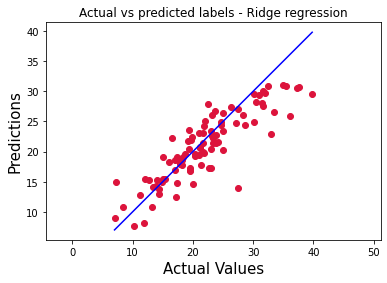

In [184]:
### Code - Plot actual vs predicted labels
plt.scatter(y_test_boston, predS,c='crimson')
p1 = max(max(pred_knn), max(y_test_boston))
p2 = min(min(pred_knn), min(y_test_boston))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Actual vs predicted labels - Ridge regression')
plt.show()

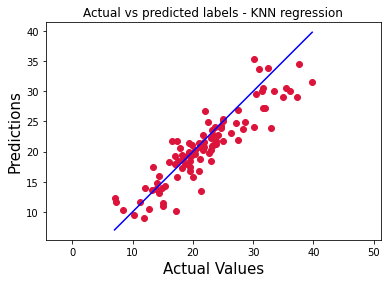

In [185]:
plt.scatter(y_test_boston, pred_knn, c='crimson')
p1 = max(max(pred_knn), max(y_test_boston))
p2 = min(min(pred_knn), min(y_test_boston))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Actual vs predicted labels - KNN regression')
plt.show()

<font color = red> ***All and all we can't really see a big difference between the models visually, as they both performed fairly well, however, we can see a slight improvement for the knn model as the Actual and predicted values are a bit closer and more cluttered on the line***